linear regression for prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b


In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


splitting the features and taRGET


In [ ]:
X=salary_data.iloc[:,:-1]
Y=salary_data.iloc[:,-1]

In [ ]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [ ]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


splitting the data into traing and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2  )

traning the linear regression model


In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=10000)#to check wheather the model is woring fine

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
  # printing the parameter values ( weights & bias)

print('weight = ', model.w[0])#weight will be numpy array
print('bias = ', model.b)#it is in integer

weight =  9512.944987627436
bias =  23707.81324657524


/tmp/ipython-input-1499020542.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('weight = ', model.w[0])#weight will be numpy array


y = 9514(x) + 23697[y(x)+b]

salary = 9514(experience) + 23697

predict the value in test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

1      36074.641730
0      34172.052733
14     66516.065691
9      58905.709701
21     91249.722659
19     80785.483172
23    101713.962145
6      52246.648209
3      42733.703222
20     88395.839162
dtype: float64


visualizing pridicted values and actual value


if the datapoints are closer to the line then it is good dataset


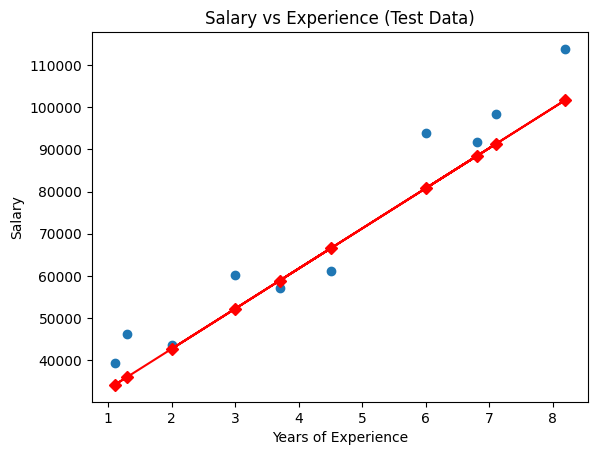

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, test_data_prediction, color='red', marker='D')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test Data)')
plt.show()